In [1]:
import pandas as pd
import numpy as np
from functions.Strategy import *
from functions.UtilsCreateDataFrame import *
from functions.UtilsGoogleDrive import *
import time
import joblib

drive = True
idx = "1Vg9w6RpPjukasvRqxM4cqPxabDi9MeyS"

C:\Users\giova\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\giova\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
path = "H:\AllTickers_trades_2020-12_2021-12.csv.gz"
coin_df = loadCleanDataFrame(path)
# let's test two months
coin_df

,ETH,BNB,XRP,BTC,ADA,SOL,DOGE,TRX,BUSD,MATIC,LTC,DOT,USDC
time,,,,,,,,,,,,,
2020-12-01 00:00:00+00:00,615.905,31.48780,0.666455,19716.285,0.172605,NaN,0.003562,0.032375,0.99965,NaN,87.820,5.37585,0.99955
2020-12-01 00:01:00+00:00,615.020,31.48485,0.664385,19671.260,0.172525,1.96650,0.003561,0.032375,0.99965,0.01958,87.625,5.36550,0.99955
2020-12-01 00:02:00+00:00,617.160,31.67270,0.667370,19695.980,0.173955,1.96545,0.003566,0.032465,0.99965,0.01963,87.840,5.37275,0.99955
2020-12-01 00:03:00+00:00,616.520,31.68055,0.668305,19646.785,0.174240,1.97090,0.003568,0.032505,0.99965,0.01963,87.630,5.37470,0.99955
2020-12-01 00:04:00+00:00,615.100,31.60980,0.665710,19607.025,0.173265,1.96120,0.003568,0.032490,0.99965,0.01956,87.455,5.36385,0.99955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:55:00+00:00,3676.720,511.45000,0.831050,46252.685,1.308500,170.22000,0.170250,0.075400,0.99995,2.52200,146.250,26.68500,0.99995
2021-12-31 23:56:00+00:00,3676.885,511.65000,0.830450,46249.995,1.309000,170.17500,0.170350,0.075420,0.99995,2.52400,146.350,26.69500,0.99995
2021-12-31 23:57:00+00:00,3677.495,511.65000,0.830000,46248.355,1.309500,170.15000,0.170350,0.075470,0.99995,2.52550,146.350,26.69000,0.99995


In [5]:
%%time
if drive:
    id_ = "1Vg9w6RpPjukasvRqxM4cqPxabDi9MeyS"
    asset_name_1 = "BTC"
    asset_name_2 = "BNB"
    folder_name, id_pair = CreatePairFolder(id_, (asset_name_1, asset_name_2))

cal_w1 = {"hours": 12}
beta_table, path_beta = create_beta_table(
    coin_df=coin_df,
    asset_name_1=asset_name_1,
    asset_name_2=asset_name_2,
    calibration_window=cal_w1,
    frequency={"minutes": 1},
    safe_output_csv=True,
    n_job=4,
    output_folder="H:",
    stat_test="adfuller",
)

if drive:
    UploadFile(file=path_beta, folder_id=id_pair)

Wall time: 1h 13min 29s


In [27]:
%%time
asset_name_1 = "BTC"
asset_name_2 = "BNB"
cal_w1 = {"hours": 12}


tr_w6 = {"hours": 12}
tr_w5 = {"hours": 6}
tr_w4 = {"hours": 4}
tr_w3 = {"hours": 2}
tr_w2 = {"hours": 1}
tr_w1 = {"minutes": 30}
tresh = [tr_w1, tr_w2, tr_w3, tr_w4, tr_w5, tr_w6]


result = getCombRet(
    coin_df=coin_df,
    asset_name_1=asset_name_1,
    asset_name_2=asset_name_2,
    trading_windows=tresh,
    calib_window=cal_w1,
    p_values=[0.1, 0.05, 0.01, 0.005],
    stop_loss=0.2,
    stat_test="adfuller",
    safe_beta_csv=True,
    input_folder="H:",
    output_folder_beta="H:",
    drive=drive,
)


SaveUploadResultStrategy(
    result, asset_name_1, asset_name_2, drive=drive, output_folder="H:", idx=idx
)


Wall time: 7.86 s


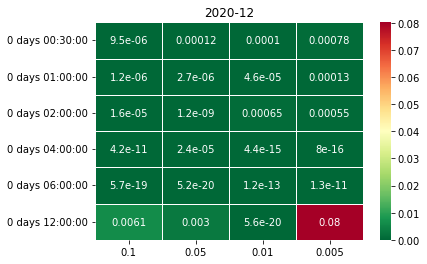

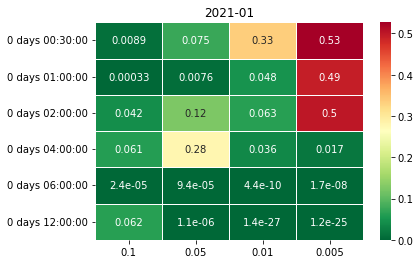

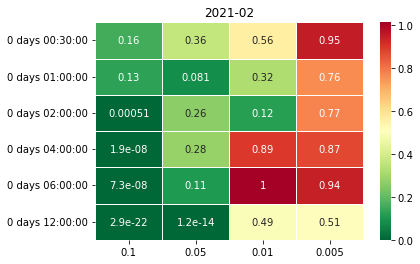

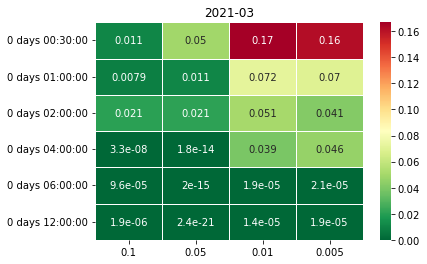

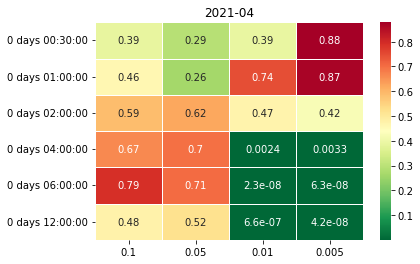

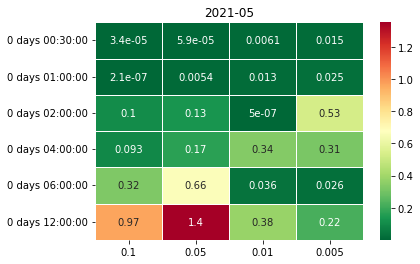

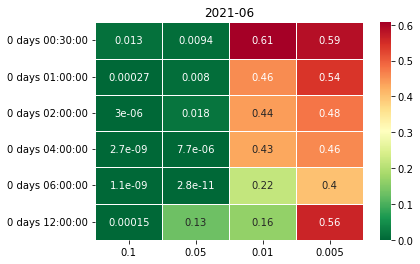

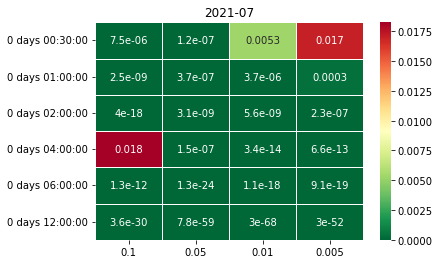

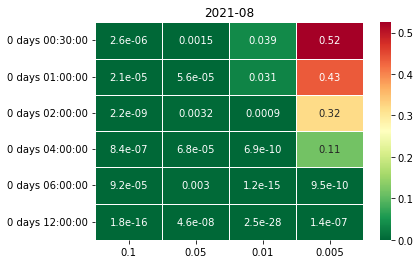

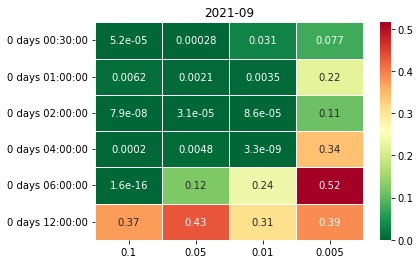

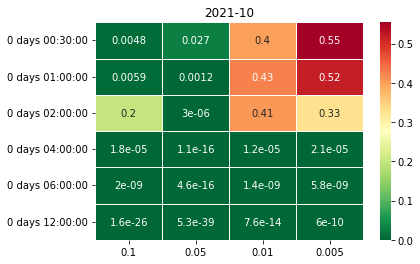

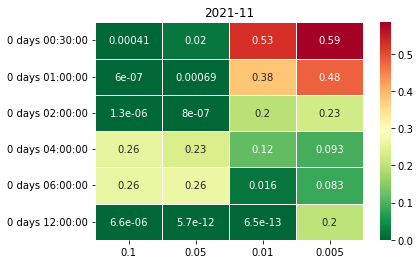

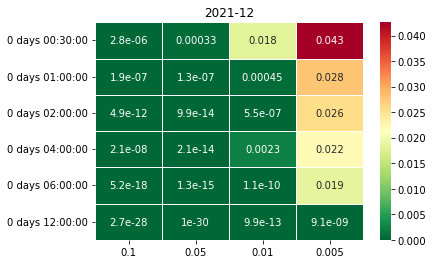

In [28]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from functions.UtilsRetrieveData import *
from functions.UtilsGoogleDrive import *

bounds = ["2020-12", "2021-12"]
dates = create_listdates(bounds)
for date in dates:
    df = pd.DataFrame(result[date][0], dtype = float)
    sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.5, annot=True, yticklabels = df.index)
    plt.title(date)
    plt.show()